<a href="https://colab.research.google.com/github/nooYeaT/NLP/blob/main/%EC%8A%A4%ED%8C%80%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt", filename="steam.txt")

('steam.txt', <http.client.HTTPMessage at 0x78c821a2faf0>)

In [ ]:
total_data=pd.read_table('steam.txt', names=['label', 'reviews'])
len(total_data)

100000

In [ ]:
total_data.head()

,label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요


In [ ]:
total_data['reviews'].nunique(), total_data['label'].nunique()

(99892, 2)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(len(total_data))

99892


In [ ]:
train_data, test_data=train_test_split(total_data, test_size=0.25, random_state=42)
print(len(train_data))
print(len(test_data))

74919
24973


<Axes: xlabel='label'>

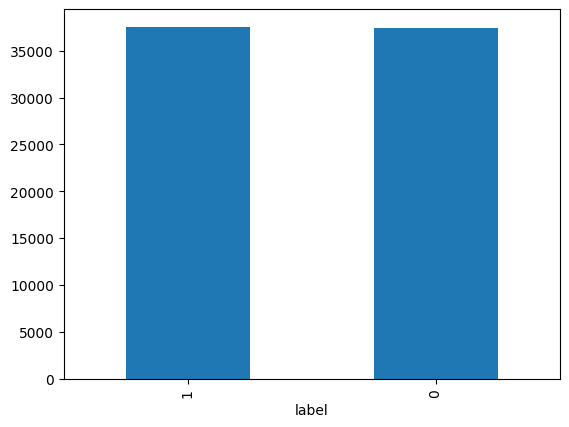

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

In [ ]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,37376
1,1,37543


In [ ]:
train_data['reviews']=train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', regex=True)
train_data['reviews'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

<ipython-input-11-2190f4e08c69>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['reviews'].replace('', np.nan, inplace=True)


,0
label,0
reviews,0


In [ ]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True) # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


전처리 후 테스트용 샘플의 개수 : 24973


<ipython-input-12-99b587826383>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [ ]:
mecab = Mecab()

train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
negative_words=np.hstack(train_data[train_data.label==0]['tokenized'].values)
positive_words=np.hstack(train_data[train_data.label==1]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('안', 8125), ('없', 7141), ('는데', 5729), ('있', 5690), ('같', 4251), ('로', 4171), ('할', 3931), ('거', 3903), ('나', 3818), ('해', 3650), ('너무', 3521), ('으로', 3351), ('기', 3350), ('했', 3262), ('어', 3155), ('습니다', 2962), ('지만', 2951), ('것', 2937), ('겠', 2901), ('않', 2898)]


In [ ]:
positive_word_count=Counter(positive_words)
print(positive_word_count.most_common(20))

[('있', 9985), ('좋', 6540), ('습니다', 5178), ('재밌', 4997), ('지만', 4870), ('할', 4855), ('해', 4357), ('없', 4149), ('로', 3931), ('으로', 3900), ('수', 3836), ('보', 3832), ('는데', 3767), ('기', 3591), ('안', 3374), ('것', 3367), ('같', 3356), ('네요', 3189), ('어', 3123), ('나', 3080)]


긍정 리뷰의 평균 길이 : 14.947979650001331
부정 리뷰의 평균 길이 : 15.284701412671232


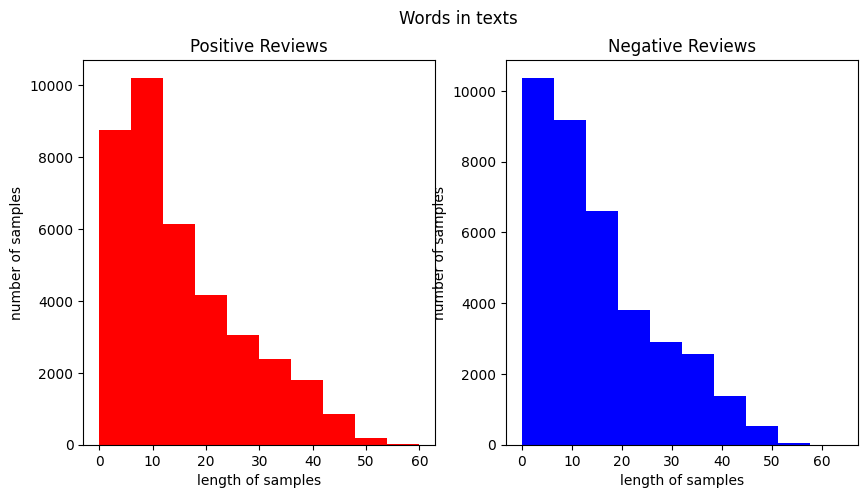

In [ ]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,5))
text_len=train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train=train_data['tokenized'].values
y_train=train_data['label'].values
X_test=test_data['tokenized'].values
y_test=test_data['label'].values

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 32920
등장 빈도가 1번 이하인 희귀 단어의 수: 13905
단어 집합에서 희귀 단어의 비율: 42.23876063183475
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.227843842634659


In [ ]:
vocab_size=total_cnt-rare_cnt+2
vocab_size

19017

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
X_train[:3]

[[469, 635, 7, 35, 86, 149, 2417, 600, 26, 8, 70, 47, 233, 110, 38, 43, 52],
 [160, 300, 18, 21, 63, 3577, 985, 6, 56],
 [7, 16, 1477, 4]]

리뷰의 최대 길이 : 64
리뷰의 평균 길이 : 15.11596524246186


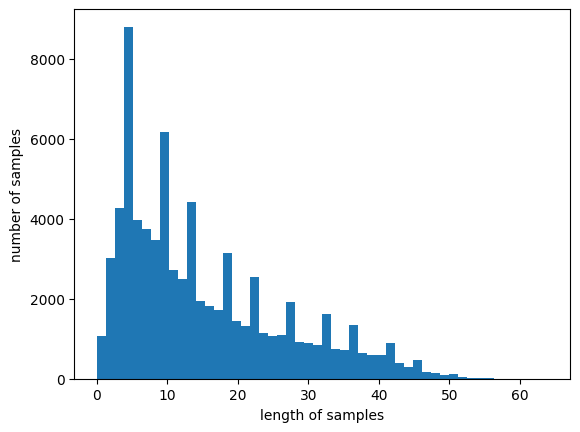

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))


In [ ]:
max_len=60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 99.99733045021956


In [ ]:
X_train=pad_sequences(X_train, maxlen=max_len)
X_test=pad_sequences(X_test, maxlen=max_len)

In [ ]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim=100
hidden_units=128

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history=model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - acc: 0.5983 - loss: 0.6600
Epoch 1: val_acc improved from -inf to 0.71216, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 179s 745ms/step - acc: 0.5985 - loss: 0.6598 - val_acc: 0.7122 - val_loss: 0.5448
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - acc: 0.7743 - loss: 0.4831
Epoch 2: val_acc improved from 0.71216 to 0.76829, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 199s 734ms/step - acc: 0.7743 - loss: 0.4830 - val_acc: 0.7683 - val_loss: 0.4808
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - acc: 0.7998 - loss: 0.4429
Epoch 3: val_acc improved from 0.76829 to 0.77523, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 172s 732ms/step - acc: 0.7998 - loss: 0.4429 - val_acc: 0.7752 - val_loss: 0.4791
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - acc: 0.8143 - loss: 0.4213
Epoch 4: val_acc improved from 0.77523 to 0.78123, saving model to best_model.keras
23

In [ ]:
loaded_model = load_model('best_model.keras')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))


781/781 ━━━━━━━━━━━━━━━━━━━━ 49s 61ms/step - acc: 0.7764 - loss: 0.4832
테스트 정확도: 0.7820


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))


In [ ]:
sentiment_predict('노잼 ..완전 재미 없음 ㅉㅉ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
88.49% 확률로 부정 리뷰입니다.


<ipython-input-43-53fd1a88dada>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new)) # 예측


In [ ]:
sentiment_predict('조금 어렵지만 재밌음ㅋㅋ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
98.23% 확률로 긍정 리뷰입니다.


<ipython-input-43-53fd1a88dada>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new)) # 예측


In [ ]:
sentiment_predict('케릭터가 예뻐서 좋아요')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
89.17% 확률로 긍정 리뷰입니다.


<ipython-input-43-53fd1a88dada>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new)) # 예측
